In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = '4Hz_8Hz_pt2_20ssaturation'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2    # offset in nA
                                               ,0.2,0.2 # amplitude in nA
                                               ,4,8   # frequency in Hz
                                              ],10000,20000,
                                       namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(20.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_New_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current coupled = <PC_Coupled_STDP.I_intrinsic: array([1.9 , 2.04, 2.06, 1.98, 2.08, 1.92, 2.  , 1.96, 1.94, 2.02]) * namp>
intrinsic current uncoupled = <PC_Uncoupled_STDP.I_intrinsic: array([1.9 , 2.04, 2.06, 1.98, 2.08, 1.92, 2.  , 1.96, 1.94, 2.02]) * namp>
t_learn = 5
number of IO 20
nr of noise is 2
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


<dummy_Coupled.weight: array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])>
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]


In [5]:
# run pt1
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 20. s
0.3882 s (1%) simulated in 10s, estimated 8m 25s remaining.
0.770625 s (3%) simulated in 20s, estimated 8m 19s remaining.
1.064025 s (5%) simulated in 30s, estimated 8m 55s remaining.
1.227025 s (6%) simulated in 40s, estimated 10m 13s remaining.
1.389025 s (6%) simulated in 50s, estimated 11m 11s remaining.
1.544025 s (7%) simulated in 1m 0s, estimated 11m 58s remaining.
1.696025 s (8%) simulated in 1m 10s, estimated 12m 37s remaining.
1.850025 s (9%) simulated in 1m 20s, estimated 13m 6s remaining.
2.009025 s (10%) simulated in 1m 30s, estimated 13m 27s remaining.
2.159575 s (10%) simulated in 1m 40s, estimated 13m 47s remaining.
2.3131 s (11%) simulated in 1m 50s, estimated 14m 2s remaining.
2.462025 s (12%) simulated in 2m 0s, estimated 14m 16s remaining.
2.619125 s (13%) simulated in 2m 10s, estimated 14m 24s remaining.
2.779025 s (13%) simulated in 2m 20s, estimated 14m 29s remaining.
2.935025 s (14%) simulated in 2m 30s, esti

19.343025 s (96%) simulated in 20m 41s, estimated 42s remaining.
19.488025 s (97%) simulated in 20m 51s, estimated 33s remaining.
19.633025 s (98%) simulated in 21m 1s, estimated 24s remaining.
19.776575 s (98%) simulated in 21m 11s, estimated 14s remaining.
19.92115 s (99%) simulated in 21m 21s, estimated 5s remaining.
20. s (100%) simulated in 21m 27s


['frequency =4', 'frequency =8']


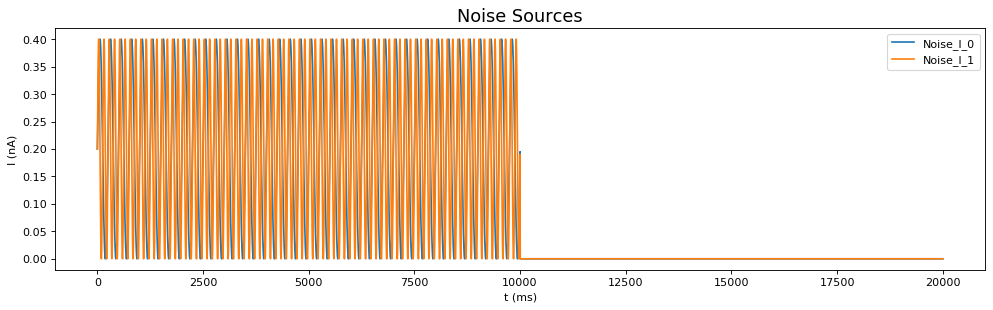

Plasticity


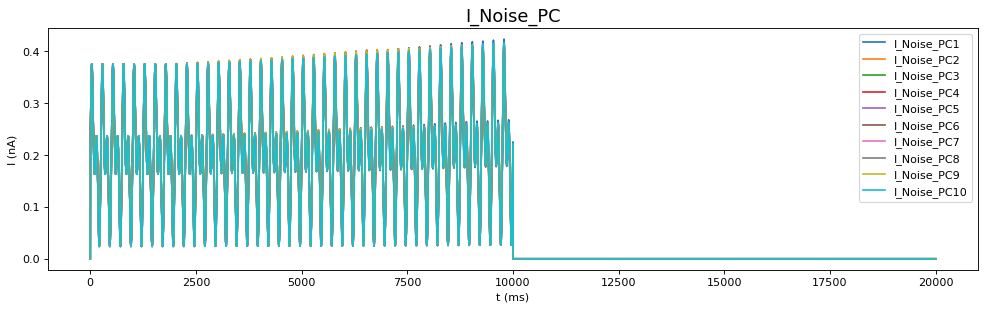

Plasticity Coupled Scenario


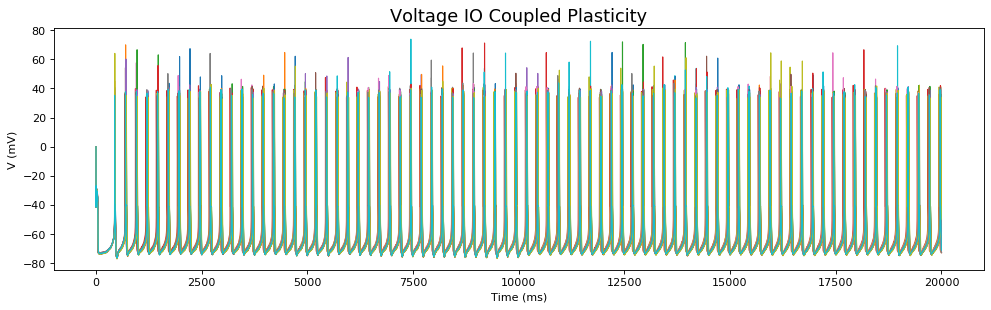

Number of spikes DCN: 758
Number of spikes DCN: 947
Number of spikes DCN: 711
Number of spikes DCN: 821
Number of spikes DCN: 673
Number of spikes DCN: 704
Number of spikes DCN: 798
Number of spikes DCN: 795
Number of spikes DCN: 647
Number of spikes DCN: 817


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


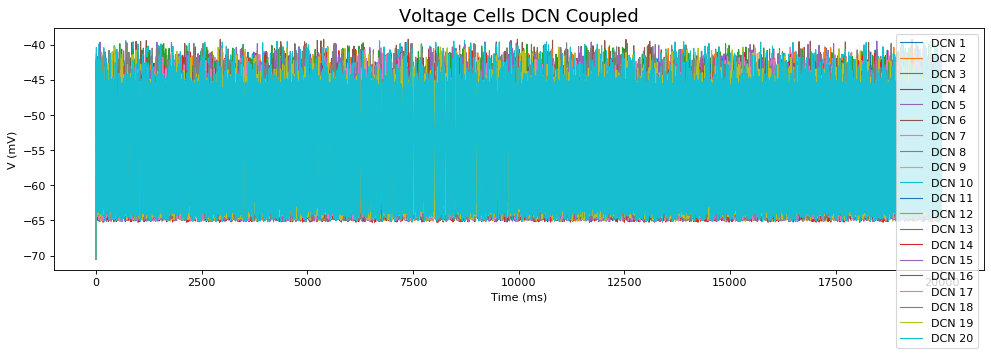

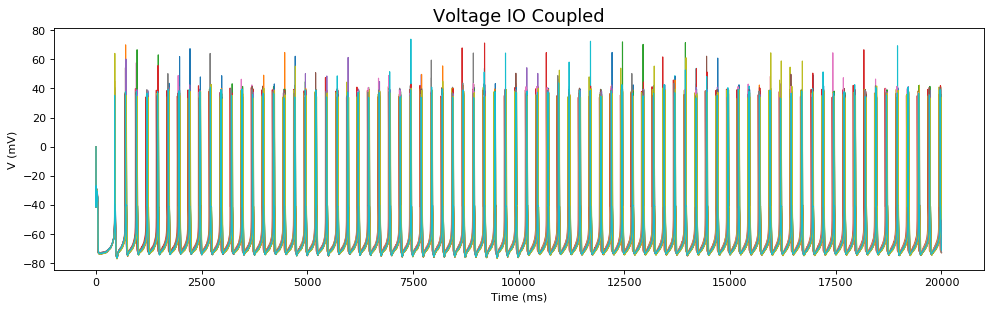

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


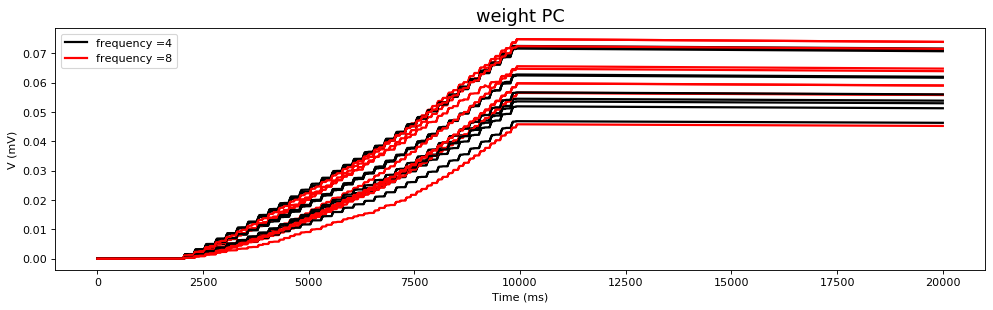

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


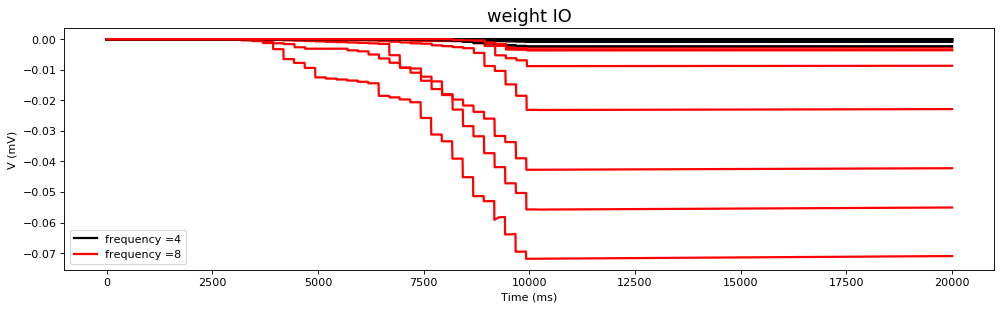

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


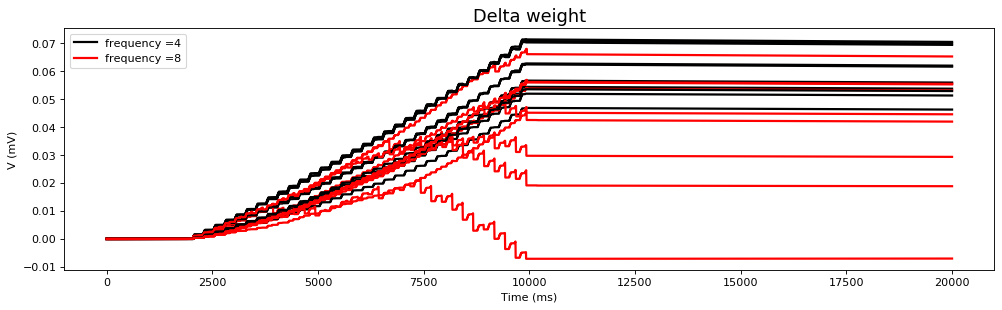

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


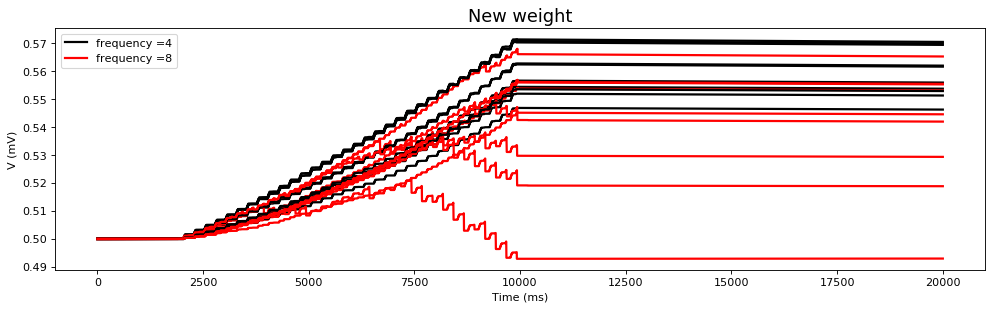

Plasticity Uncoupled Scenario


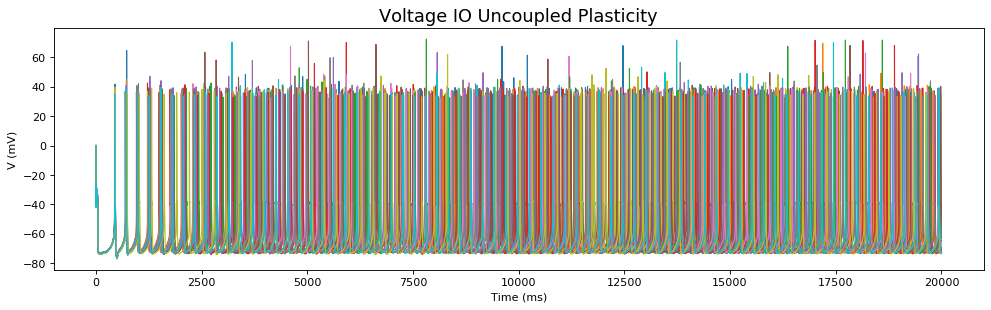

Number of spikes DCN: 694
Number of spikes DCN: 820
Number of spikes DCN: 634
Number of spikes DCN: 694
Number of spikes DCN: 609
Number of spikes DCN: 633
Number of spikes DCN: 707
Number of spikes DCN: 737
Number of spikes DCN: 594
Number of spikes DCN: 712


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


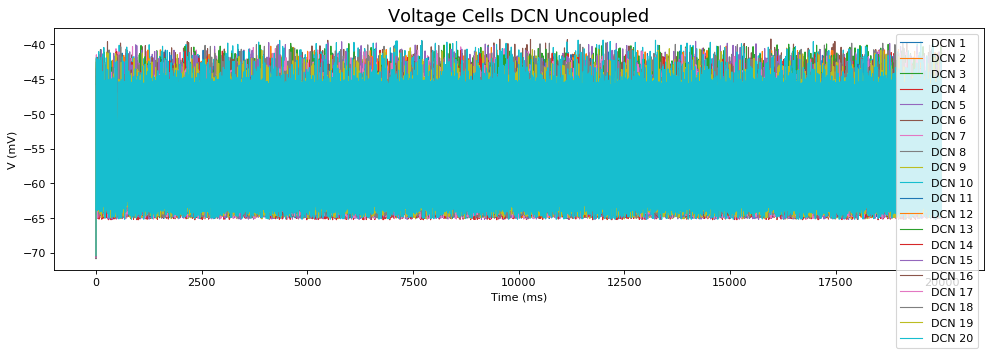

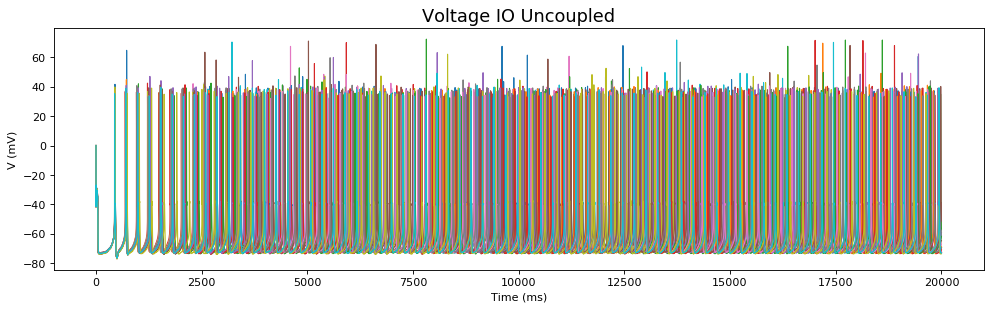

<Figure size 1200x320 with 0 Axes>

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


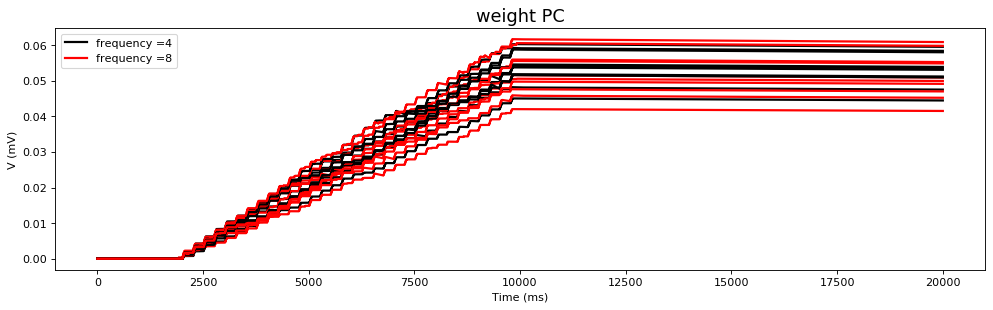

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


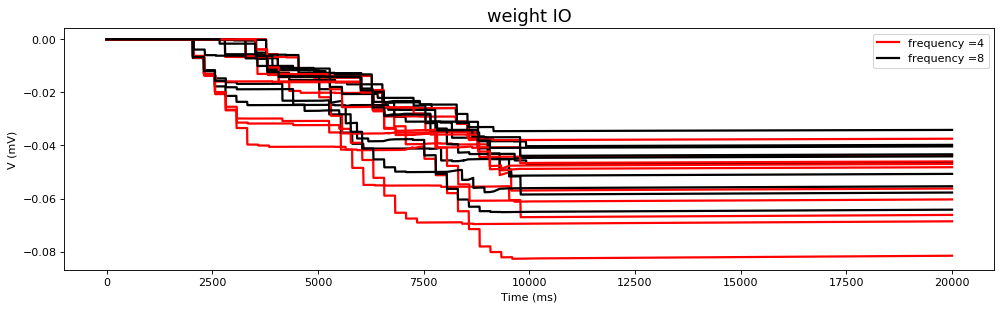

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


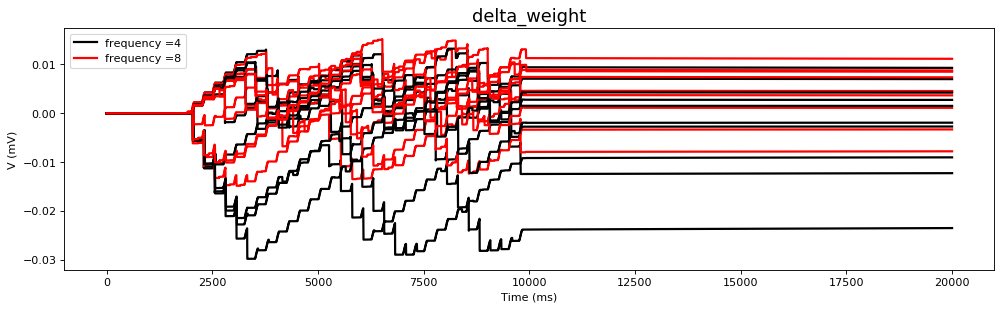

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


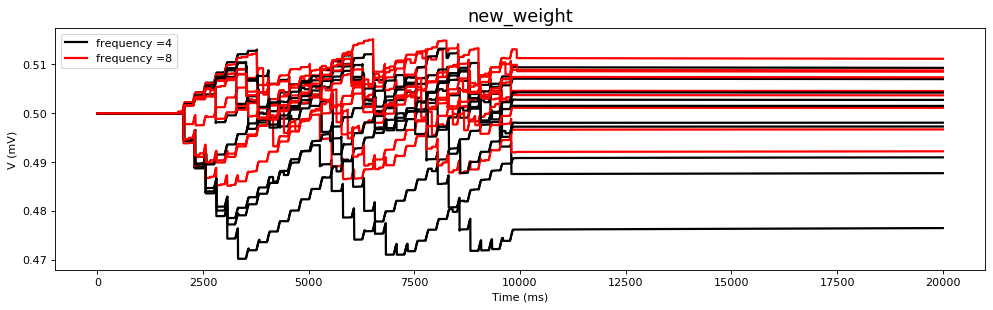

In [6]:
from G_Plot_Plasticity import *

In [7]:
#from F_save_data_Plasticity import *

In [8]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved
population rates saved


In [9]:
%matplotlib notebook
#print(y)
y_post = np.append(np.zeros(1000),np.ones(59000))
print(y_post)
print(mon_N_PC_Uncoupled.w_IO_uncoupled)
x=np.linspace(0,len(y_post),len(y_post))
print(x)
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,2):
    x= np.abs(mon_N_PC_Uncoupled.weight_IO[k])/(np.abs(mon_N_PC_Uncoupled.weight_IO[k])+mon_N_PC_Uncoupled.weight_PC[k])
    x2 =1-x

    plt.plot(x)
    plt.plot(x2)
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.scatter(x,mon_N_PC_Coupled.freq_dep[k])
    #plt.scatter(x,mon_N_PC_Uncoupled.freq_dep[k])
    #plt.plot(mon_N_PC_Coupled.f_st_PC_coupled[k],color='black')
plt.xlim([0,30000])    
#plt.legend(['w io coupled', 'w pc coupled'])
plt.show()
print('mean x',np.nanmean(x))
print('std x',np.nanstd(x))
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,20):

    plt.plot(mon_N_PC_Coupled.tau[k],color='green')
    plt.plot(mon_N_PC_Uncoupled.tau[k],color='red')
    
    #plt.plot(mon_N_PC_Uncoupled.w_PC_uncoupled[k],color='blue')
plt.legend(['w pc unc', 'w io unc'])
plt.show()

#plt.title('distribution uncoupled')
plt.figure()
for k in range(0,20):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.plot(mon_N_PC_Coupled.freq_dep[k],color='red')
    #plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
    #plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')

    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='green')

#plt.legend(['long term', 'short term'])
plt.figure()
plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
plt.show()



[0. 0. 0. ... 1. 1. 1.]
[[0.5        0.5        0.5        ... 0.99995913 0.99995913 0.99995913]
 [0.5        0.5        0.5        ... 0.99999536 0.99999536 0.99999536]
 [0.5        0.5        0.5        ... 0.99999542 0.99999542 0.99999542]
 ...
 [0.5        0.5        0.5        ... 0.99999398 0.99999398 0.99999398]
 [0.5        0.5        0.5        ... 0.99999059 0.99999059 0.99999059]
 [0.5        0.5        0.5        ... 0.9999977  0.9999977  0.9999977 ]]
[0.00000000e+00 1.00001667e+00 2.00003333e+00 ... 5.99980000e+04
 5.99990000e+04 6.00000000e+04]


<IPython.core.display.Javascript object>

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
 [py.warnings]


mean x 0.40930761741823973
std x 0.12929028867513984


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from F_save_data_Plasticity import *

In [11]:
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.mean_freq_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.mean_freq_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('PC moving average')
for k in range(0,1):
    plt.plot(mon_N_PC_Coupled.y[k],color='red')
    #plt.plot(mon_N_PC_Coupled.f_st_PC[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('IO moving average')
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')

plt.figure()
plt.title('Difference in moving average IO (short term - long term)')
#for p in range(0,n_IO):
#    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]
#    idxio = (difio>0).astype(float)
#    procentage_LTD = sum(idxio)/1000
#    print('depression %',procentage_LTD)
#    plt.plot(mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p])
#plt.figure()
for p in range(0,10):
    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]

    dif=mon_N_PC_Coupled.f_st_PC[p]-mon_N_PC_Coupled.f_lt_PC[p]
    idx = (dif>0).astype(float)
    #plt.plot(idx)
    #plt.ylim([0,1.1])
    procentage_LTP = sum(idx)/1000
    plt.plot(dif)
    plt.plot(difio)
    print('potentiated %',procentage_LTP)
print(mon_N_PC_Coupled.f_lt_IO.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: No attribute with name mean_freq_IO_uncoupled

In [ ]:
print(np.floor(-0.1))

In [ ]:
neuron = 0
ex = 2000
wpc = mon_N_PC_Coupled.weight_PC[neuron]
wio = mon_N_PC_Coupled.weight_IO[neuron]
maxDelay = 100
gr = (1-1/(1+exp(-ex*(wpc+np.abs(wio)-0.3*0.5))))
prop= (np.abs(wio)/(np.abs(wio)+wpc))
prop2=(np.abs(wpc)/(np.abs(wio)+wpc))
tauIO = maxDelay*(np.abs(wio)/(np.abs(wio)+wpc))*gr
tauPC = maxDelay*(np.abs(wpc)/(np.abs(wio)+wpc))*gr

fig, axs = plt.subplots(4,1, figsize=(10,20))

ax1 = plt.subplot(4,1,1)
plt.plot(tauPC)
plt.plot(tauIO)

ax2 = plt.subplot(4,1,2)
plt.plot(wpc)
plt.plot(wio)

ax3 = plt.subplot(4,1,3)
plt.plot(prop2)
plt.plot(prop)
plt.show()

In [ ]:
x= np.linspace(0,20,10000)
sin1 = np.sin(x)
sin2 = np.sin(x*3)
neu = [2.5,5,14,18]
yPC = np.ones(len(neu))

f, a =plt.subplots(2,1, figsize=(20,15))
ax=plt.subplot(211)
plt.plot(x,sin1,linewidth=4)
for k in neu:
    plt.axvline(x=k,color='r',linestyle='--')
plt.ylabel('Input current [nA]')
plt.subplot(212,sharex=ax)
plt.scatter(x=neu,y=yPC,marker='|', color='black',s=1000)
plt.xlabel('time [s]')
#plt.xlim([0,20])
plt.show()
plt.figure()
plt.plot(x,sin2,linewidth=3)
plt.show()